# Сравнение моделей регрессии
Даны ошибки двух регрессионых моделей. Можно ли сказать, что одна из моделей работает лучше чем другая?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

Посмотрим на данные:

In [3]:
df = pd.read_csv('rmodels.tsv', sep='\t')
df.head()

,err1,err2
0,-0.136588,-0.131182
1,-0.289688,-0.272290
2,0.613948,0.626212
3,-0.678777,-0.679792
4,0.647958,0.636701


In [4]:
print('Average difference between errors: {}'.format((df['err1'] - df['err2']).mean()))

Average difference between errors: 0.0032766997935748466


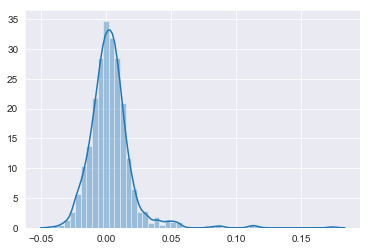

In [5]:
sns.distplot(df['err1'] - df['err2'])

Визуализация разницы ошибок говорит о том, что распредение данных далеко от нормального. Проверим с помощью критерия Шапиро-Уилка:

In [6]:
from scipy.stats import shapiro
shapiro(df['err1'] - df['err2'])

(0.8282703161239624, 5.905189722824731e-30)

Гипотеза о нормальности отвергается. Для проверки гипотезы о равенстве средних воспользуемся критерием Вилкоксона.

In [7]:
from scipy.stats import wilcoxon
wilcoxon(df['err1'], df['err2'])

WilcoxonResult(statistic=162287.0, pvalue=3.6665224292023824e-07)

### Вывод
Ошибка классификатора 2 меньше ошибки классификатора 1 в среднем на 0.0033. Результат статистически значимый, pvalue = 3e-7.